***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Topic:-A-first-introduction-to-the-python-ecosystem-for-ML" data-toc-modified-id="Topic:-A-first-introduction-to-the-python-ecosystem-for-ML-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Topic: A first introduction to the python ecosystem for ML</a></span><ul class="toc-item"><li><span><a href="#Outline" data-toc-modified-id="Outline-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><u>Outline</u></a></span></li></ul></li><li><span><a href="#From-the-limitations-of-Python's-lists-to-NumPy-" data-toc-modified-id="From-the-limitations-of-Python's-lists-to-NumPy--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>From the limitations of Python's lists to <code>NumPy</code> <a name="plists"></a></a></span></li><li><span><a href="#NumPy:-Numerical-computing-in-Python-(beyond-lists)" data-toc-modified-id="NumPy:-Numerical-computing-in-Python-(beyond-lists)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NumPy: Numerical computing in Python (beyond lists)</a></span><ul class="toc-item"><li><span><a href="#Arrays-and-indexing" data-toc-modified-id="Arrays-and-indexing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Arrays and indexing<a name="arrays"></a></a></span></li></ul></li><li><span><a href="#Tabular-data-and-CSV-data-formats" data-toc-modified-id="Tabular-data-and-CSV-data-formats-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tabular data and CSV data formats</a></span></li><li><span><a href="#From-NumPy-to-Pandas-passing-by-CSVs:" data-toc-modified-id="From-NumPy-to-Pandas-passing-by-CSVs:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>From NumPy to Pandas passing by CSVs:</a></span><ul class="toc-item"><li><span><a href="#A-first-example-of-use-of-Pandas" data-toc-modified-id="A-first-example-of-use-of-Pandas-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>A first example of use of Pandas</a></span></li><li><span><a href="#Information-about-the-data" data-toc-modified-id="Information-about-the-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Information about the data</a></span></li><li><span><a href="#Indexing:-Accessing-data-and-range-of-data" data-toc-modified-id="Indexing:-Accessing-data-and-range-of-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Indexing: Accessing data and range of data</a></span></li></ul></li><li><span><a href="#Read-data-from-file-repositories" data-toc-modified-id="Read-data-from-file-repositories-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Read data from file repositories</a></span><ul class="toc-item"><li><span><a href="#Kaggle" data-toc-modified-id="Kaggle-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Kaggle</a></span></li><li><span><a href="#Methods-to-read-and-inspect-the-data" data-toc-modified-id="Methods-to-read-and-inspect-the-data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Methods to read and inspect the data</a></span></li></ul></li><li><span><a href="#Display-the-data-using-matplotlib" data-toc-modified-id="Display-the-data-using-matplotlib-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Display the data using <code>matplotlib</code></a></span></li></ul></div>

***
# Topic: A first introduction to the python ecosystem for ML
***

## <u>Outline</u>

The main goal of this lecture / notebook is to introduce the use of `Pandas` for reading and storing datasets to be used in a ML process cycle. The focus here will be on datsets in CSV format.  

`Pandas` builds on `NumPy`, such that they can import/use numpy's objects and, more importantly, they extend them to make data manipulation more flexible and effective.  

Therefore, we will first go through `numpy`, in particular numpy's `arrays` and then introduce Pandas' `Series` and `DataFrame` objects. 
  
The considered list of topics will be:

   - (Very) Short introduction to `NumPy`: from **lists** to **arrays** <br><p>
    
   - From `NumPy` to `Pandas`: from arrays to **labeled arrays**<br><p>
    
   - Datasets and **CSV** data files <br><p>
    
   - Basic Pandas methods for reading and inspecting datasets <br><p>
    
   - A simple example: read the data froma CSV file, display the data, select the features
    

# From the limitations of Python's lists to `NumPy` <a name="plists"></a>

Pyhton's built-in lists are extremely flexible objects, however, they aren't appropriate for performing **element-wise operations,** which are very useful in ML! Instead, we have to *explicitly iterate* over the elements of the list.

Let's see a few simple examples to appreciate the importance of this fact.

In [8]:
# this creates a list with the first n integers
x = list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

For instance, if we want to multiply all the elements of the list by the same constant value, i.e., we want to apply a list-wise operation, we need to explicitly iterate over all the elements of the list, like in the example below.

In [12]:
# this multiplies the list elements by the constant 2
y = [2*e for e in x]
y

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

However, in linear algebra and calculus, if we look at `x` as a **coordinate vector,** ${\bf x} = [0,1,2,3,4,5,6,7,8,9]$, we are used to write something like:

$$ {\bf y} = 2{\bf x} $$

which is both more compact and more intuitive (at least from a mathematical point of view)

If we try to write the same thing in python we would get a wrong result!

In [14]:
y = x * 2  # this creates a new list that doubles the original one!
y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Another example is the **sum of two coordinate vectors:**
    $$ z = y + z$$
    
If for instance $x = [0,1,2,3,4,5,6,7,8,9]$ and $y = [1,2,3,4,5,6,7,8,9,10]$, $z$ is the vector that results from the element-wise sum of the two vectors: $z = [1,3,5,7,9,11,13,17,19]$

Unfortunately, adopting the algebraic notation in python doesn't really work, since the `+` operator is overloaded to work as a concatenation operator, as shown by the example below.

In [3]:
x = list(range(10))
y = list(range(1,11))
z = x + y
print(z)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Instead, the **element-wise sum of two vectors** (lists of numeric objects) requires to *iterate over the elements:*

In [4]:
z = [x[i] + y[i] for i in range(len(x))]
z

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Sure, we can get the same result by using the `map()` built-in function, but we have to write the function that does the pairwise job:

In [5]:
def add(a,b):
    return a+b

z = map(add, x, y)
print(list(z))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


Below a better version of the custom function `add()`, such that it can handle the sum of any number of vectors:

In [6]:
def add(*x):
    return sum(x)

z = map(add, x, y, [-1]*10)
print(list(z))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


Also the `zip()` function could be used, that it allows to write an even more compact code but still requiring to iterate over the elements:

In [71]:
z = [sum(s) for s in zip(x, y)]
z

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

All these solutions available in *plain* python are feasible, but not really satisfactory!

The situation is even worse when we try for instance to multiply two vectors/lists to get a **dot product:**

$$ z = {\bf x}\cdot {\bf y} $$

where $z = \sum_{i=0}^n x_i\cdot y_i$ 

In the example case of ${\bf x} = [0,1,2,3,4,5,6,7,8,9] $, ${\bf y} = [1,2,3,4,5,6,7,8,9,10]$, $z=330$ 

Also in this case, if we try to mimic the algebraic notation in python, we get an error!

In [75]:
try:
    z = x * y
except:
    print('two lists cannot be multiplied!')

two lists cannot be multiplied!


Instead, again, an iteration is needed to obtain the desired result (e.g., using `zip()`):

In [73]:
z = [s[0]*s[1] for s in zip(x, y)]
sum(z)

330

# NumPy: Numerical computing in Python (beyond lists)

The core functionalities of NumPy are the `ndarray` data structure,  and `Ufuncs`,  **Universal functions**. `ndarray` implements an *multi-dimensional* **array** object
which is the core data container for all of the numpy operations. Universal functions are the functions which operate on ndarrays in an **element by element** fashion. 

https://numpy.org/devdocs/user/quickstart.html

The numpy arrays are strided views on memory. They precisely allow to perform array-wise numerical operations.

In order to perform array-wise operations, numpy's arrays should be **homogeneously typed**: all elements of a single array be of the same type (it is however possible to create arrays that aren't homogeneously typed)


**Import statement for NumPy**

In [7]:
import numpy as np

NumPy’s main object is the **multidimensional *array***. It is a **table of elements** (usually numbers), possibly all of the same type, indexed by a *tuple* of non-negative integers. 

In NumPy <u>dimensions are also called **axes**.</u>

NumPy’s array class is called `ndarray`. It is also known by the *alias* `array`.

`np.array(it)` is the main class method for creating an `ndarray` object directly, or creating it from other iterable types by **typecasting**.

E.g., creation of an array object from a `list/tuple` sequence object using `np.array(seq)`:

In [14]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
print(x, type(x))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>


**Element-wise operations** can be now performed in linear algebra notation using array types!

In [16]:
x * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [19]:
y = np.array( list(range(1,11)))
z = x + y
z

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [22]:
z = x * y
sum(z)

330

Element-wise operations are done by the application of **universal function objects,** which are the second core component of numpy.

***
For more information about the definition and use of arrays, you are kindly referred to the relatively large amount of resources available on the Internet. 

A good start is from the official website:
https://numpy.org/devdocs/user/quickstart.html

Below, only basic information about numpy's arrays is provided for the purpose of introducing Pandas's objects.
***

## Arrays and indexing<a name="arrays"></a>

Numpy's core data object is the `array`, which is mainly designed for **numerical processing.**

A numpy's 1D array looks like the following:<br><p>

<div>
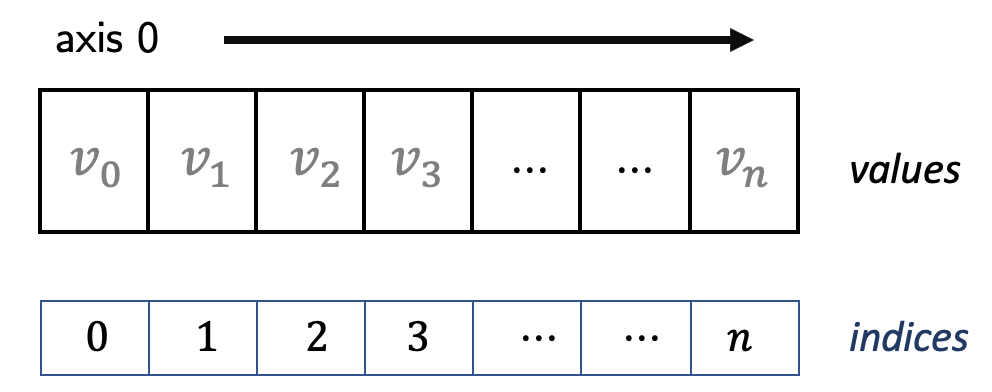
</div>

A **numeric index is associated to each entry.**

In [13]:
x = np.array([1, 3, 5, 7, 9])
print(x.ndim, x.shape)

1 (5,)


Elements of the array are accessed using numeric **indexing and ranges**

In [5]:
x[3]

7

In [6]:
x[2:5]

array([5, 7, 9])

A 2D array looks like:<br>
<div>
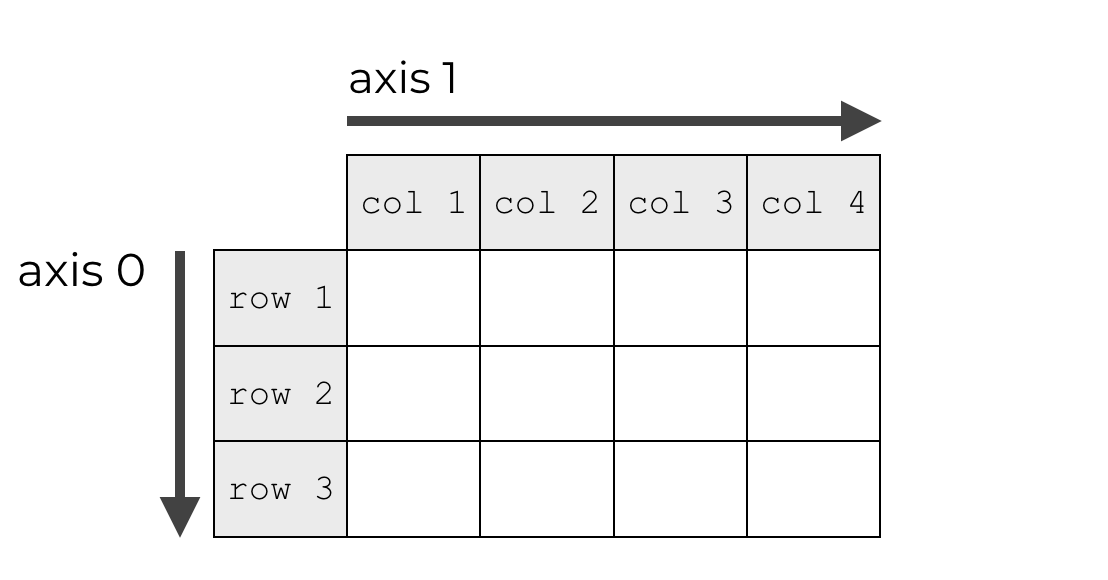
</div>

where the **rows and columns are *numeric* indices**

In [24]:
x = np.array([ [1, 3, 5, 7, 9], [2, 4, 6, 8, 10], [-1, -2, -3, -4, -5] ])
print(x.ndim, x.shape)
print(x)

2 (3, 5)
[[ 1  3  5  7  9]
 [ 2  4  6  8 10]
 [-1 -2 -3 -4 -5]]


The array `x` has two dimensions (`ndim` attribute), with 3 elements in dimension 0, and each of these elements have 5 elements, in dimension 1 (`shape` attribute)

Indexing and ranging can now be performed over **both dimensions** to access individual or groups of data, by row or by column.

In [24]:
x[1,3]

8

Note that with pythons' lists, the notation would have been `x[1][3]`

In [26]:
x[0,2]

5

A **range** notation, `:`, allows to select a subset of rows or columns, or both

In [27]:
x[1:3 , 3]

array([ 7,  8, -4])

Using only one index selects one full row

In [28]:
x[1]

array([ 2,  4,  6,  8, 10])

In [30]:
x[2, 1:4]

array([-2, -3, -4])

***
# Tabular data and CSV data formats

Are the numpy arrays suitable to flexibly deal with datasets? Yes and no. 

Datasets are commonly stored in **tabular form**, that would make them suitable to be stored as two-dimensional numpy arrays. 

However, datasets also have **labels,** that are useful to refer to data, especially when manipulating them interactively.
***

Let's give a look into a typical example of dataset, considering the monthly evolution of the Amazon's stock market prices at Nasdaq.

Data are stored in a **CSV file** dowloaded from Yahoo! Finance https://finance.yahoo.com/quote/AMZN/history?period1=1521362028&period2=1552898028&interval=1mo&filter=history&frequency=1mo

**Opening the file in Excel**

<img src="csv/excel.png" width="700" align="left">

**Opening the file with a regular text editor**

<img src="csv/amazon_emacs.png" width="600" align="left">

***
The file is in **CSV format (Comma Separated Values)**, a quite flexible and compact data format which is around since long time. CSV is a format commonly used to hold in a file data that can be naturally represented in **tabular form** (e.g., excel-like):  **M data <u>records/rows,</u> each consisting of (at most) N ordered <u>fields/columns</u>**

<div>
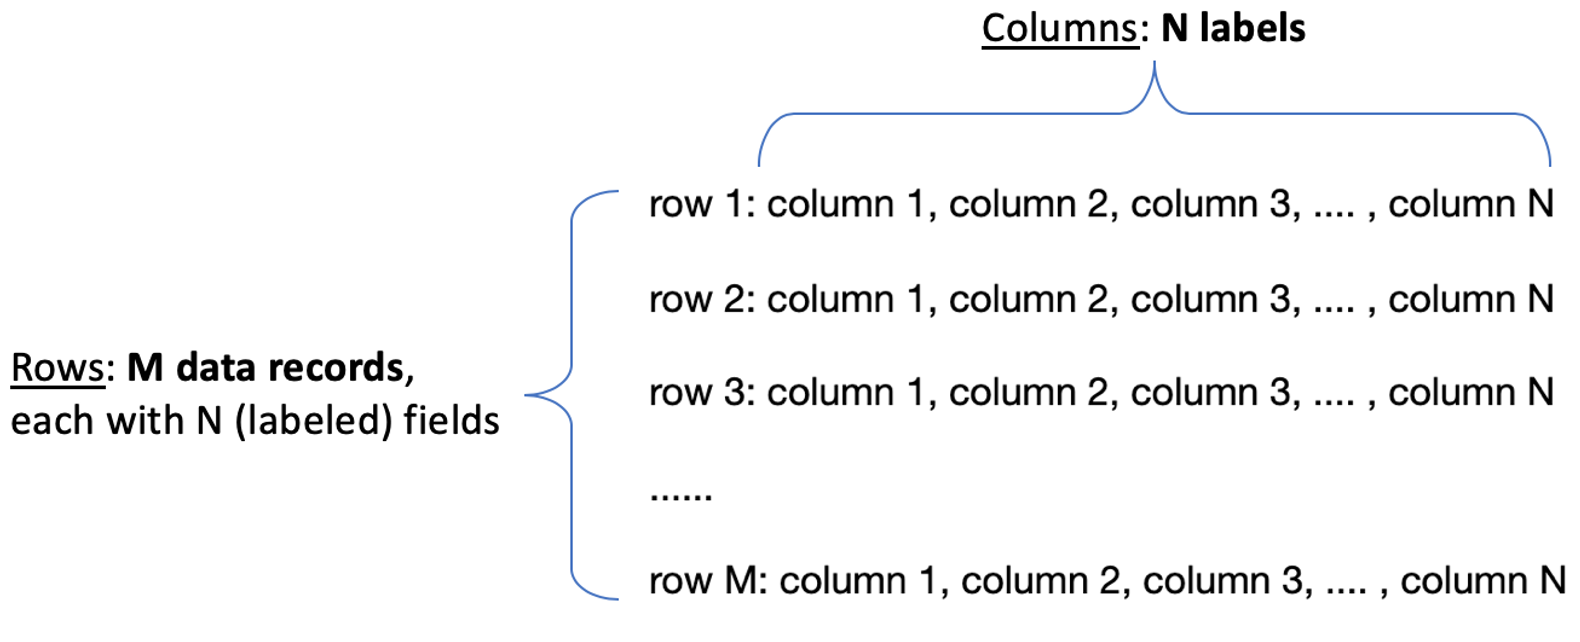
</div>
<br><p>

***

- Data is represented as **matrix** where each column refers to a common object
and each row is a different data entry. 

- <u>The first row, optionally, can/should include **string labels**, explaining the meaning of the fields</u>
<br><p>
    
<div>
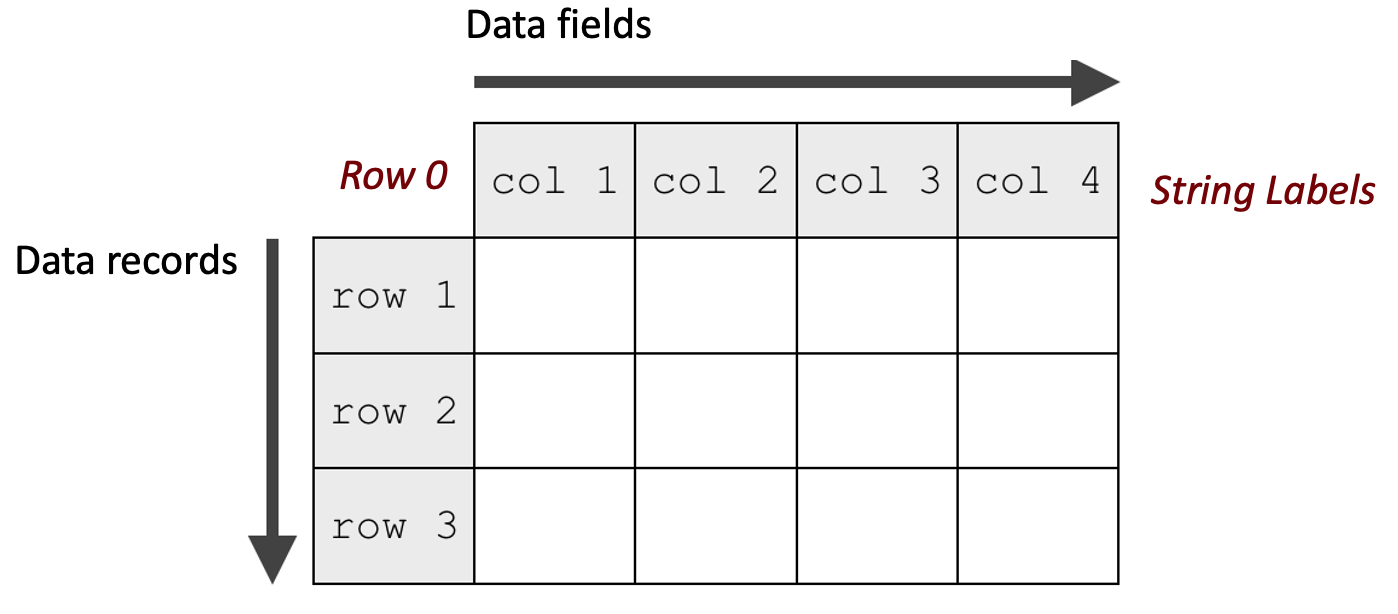
</div>
<br><p>

- **Column data are separated by a given <u>delimiter.</u>** The default delimiter is a *comma,* but
other characters can be used as a delimiter<br><p>

- **Examples** of rows / columns data:

    E.g.: columns are metereological measurements at N different metereological stations,
    where each row reports the measures for a different day

    E.g.: columns are personal data, such as name, address, and ID, where each row of data
    refers to a different person

    E.g., each column is the student grade for a specific course, where each row reports
    the set of grades for a different student<br><p>

***
# From NumPy to Pandas passing by CSVs:

It'd be nice to add labels to dimensions of a numpy array and use labels to refer to the entries, in order to write something like `data['Employee 10', 'Salary']`, which is both readable and effective.
***

Indeed, this is what the `csv` pyhton module can achieve by reading a CSV file into a list of ordered dictionaries, where each record is a dictionary with `N` labels. However, Pandas do it better! :-)

- Pandas takes a 1D numpy array and provides a **labeled index on it,** in addition to the usual numeric indexing

<div>
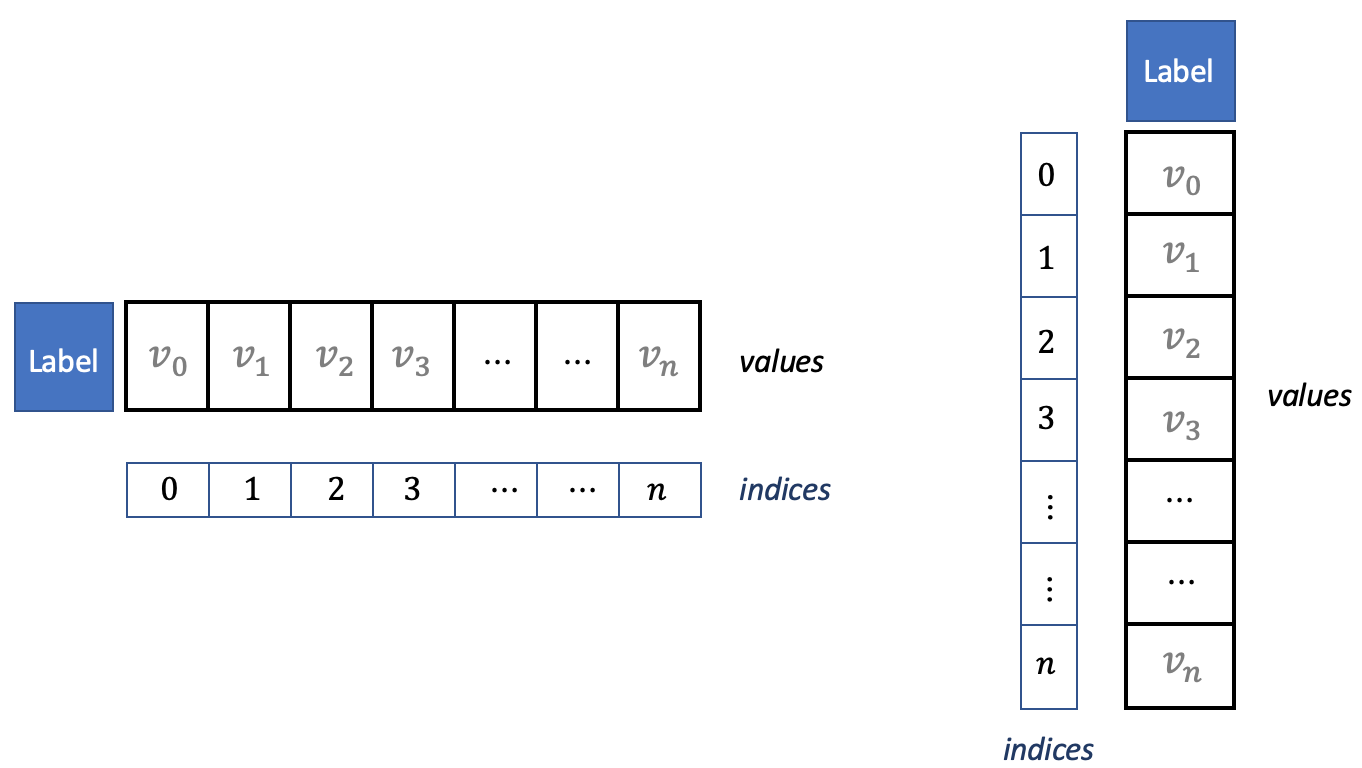
</div>
<br><p>

- Pandas takes a 2D numpy array and **provides a labeled index on it,** in addition to the usual numeric indexing

<div>
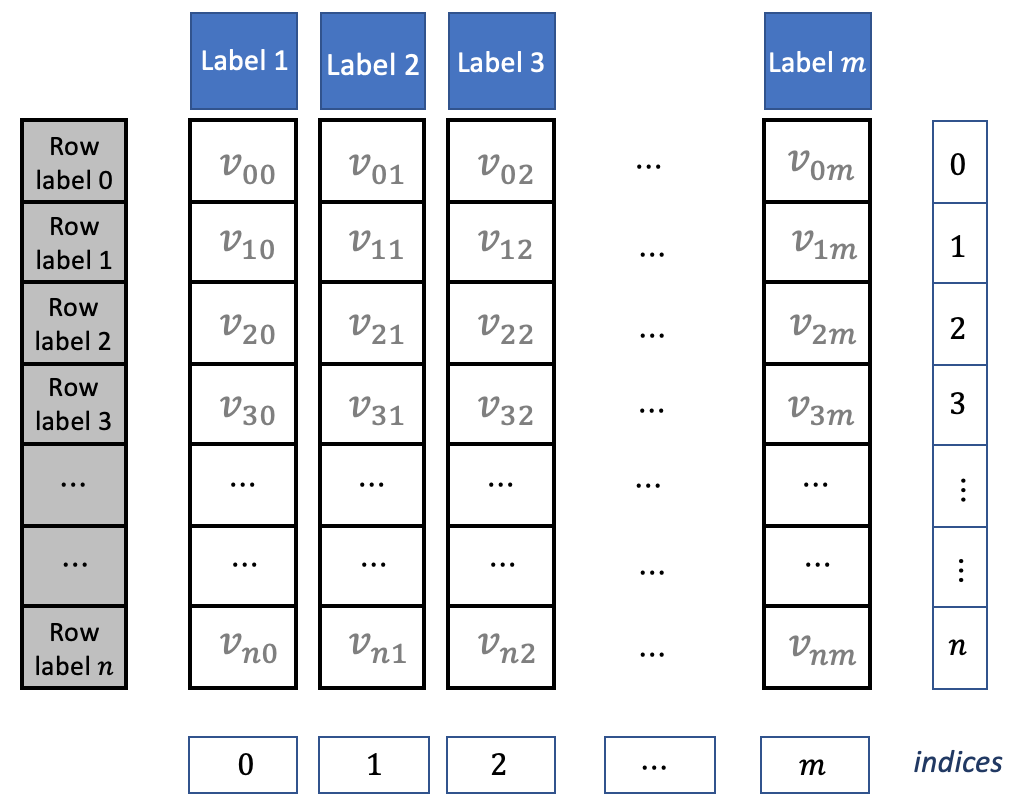
</div>
<br><p>

**Pandas make use of two core data structures that correspond to 1D and 2D labeled numpy arrays:** `Series` and `DataFrames`

- A `Series` is essentially a `column` array, a labeled 1D numpy array <br><p>

- A `DataFrame` is a multi-dimensional table made up of a collection of rows (records) or columns/fields, a 2D labeled numpy array

<div>
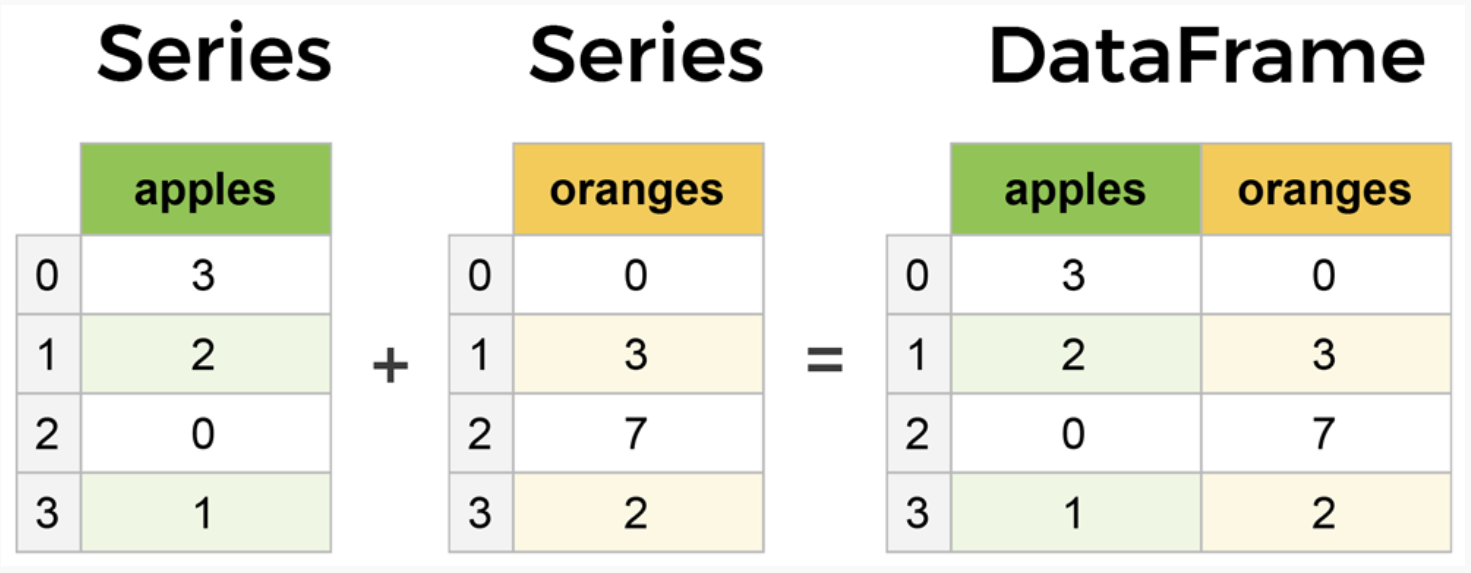
</div>
<br><p>

## A first example of use of Pandas

Let's create a simple dataset using **Pandas** (*Pan*el *Da*ta: data sets containing observations of multiple phenomena obtained over multiple time periods for the same firms or individuals). 

Let's create a first pandas object with some **dictionary data**

In [33]:
import pandas as pd

apples = {
    'apples': [3, 2, 0, 1]
}

purchases_apples = pd.Series(apples)  # e.g. purchases of apples at different times

print(purchases_apples, type(purchases_apples))

apples    [3, 2, 0, 1]
dtype: object <class 'pandas.core.series.Series'>


In [29]:
oranges = {'oranges': [0, 3, 7, 2]}
purchases_oranges = pd.Series(oranges) 

print(purchases_oranges, type(purchases_oranges))

oranges    [0, 3, 7, 2]
dtype: object <class 'pandas.core.series.Series'>


A dictionary with two labeled sets of data

In [42]:
fruits_purchases = {}
fruits_purchases.update(apples)
fruits_purchases.update(oranges)
fruits_purchases

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}

In [44]:
purchases = pd.DataFrame(fruits_purchases)
purchases

apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

We can add also **row indexes** (e.g., month of purchase)

In [49]:
purchases = pd.DataFrame(fruits_purchases, index=['January', 'March', 'April', 'June'])
purchases

apples  oranges
January       3        0
March         2        3
April         0        7
June          1        2

## Information about the data

Let's get some **basic info** about our data: `.info()`

In [50]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, January to June
Data columns (total 2 columns):
apples     4 non-null int64
oranges    4 non-null int64
dtypes: int64(2)
memory usage: 96.0+ bytes


What about the **shape** (rows, columns) of the tabular data? `.shape`

In [54]:
(records, fields) = purchases.shape
print('Our purchase data contain {} records/rows, each with {} fields / data attributes'.format(records, fields))

Our purchase data contain 4 records/rows, each with 2 fields / data attributes


Let's peek at the data: `head()`, `tail()`

In [56]:
purchases.head(2)

apples  oranges
January       3        0
March         2        3

In [57]:
purchases.tail(2)

apples  oranges
April       0        7
June        1        2

Get the **names of the labels / attributes**: `.columns

In [61]:
purchases.columns

Index(['apples', 'oranges'], dtype='object')

## Indexing: Accessing data and range of data

For rows, we have two options:

- `.loc` - locates by name
- `.iloc`- locates by numerical index

In [66]:
purchases.iloc[1]

apples     2
oranges    3
Name: March, dtype: int64

In [67]:
purchases.loc['June']

apples     1
oranges    2
Name: June, dtype: int64

In [71]:
purchases.iloc[1:3]

apples  oranges
March       2        3
April       0        7

In [72]:
purchases.iloc[1:3, 1]

March    3
April    7
Name: oranges, dtype: int64

In [78]:
purchases.loc['June', 'apples']

1

In [79]:
purchases.loc[:, 'apples']

January    3
March      2
April      0
June       1
Name: apples, dtype: int64

***
# Read data from file repositories
***

## Kaggle

https://www.kaggle.com/

https://www.kaggle.com/datasets

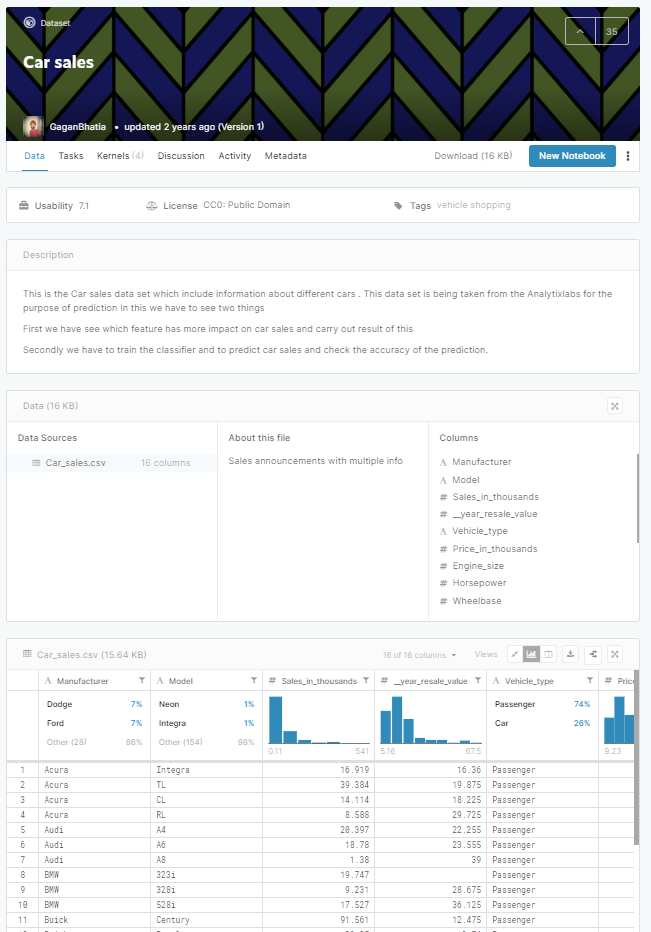

## Methods to read and inspect the data

In [34]:
path = '../datasets/car_data.csv'

In [35]:
data = pd.read_csv(path) 

In [6]:
data

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0             ritz  2014           3.35           5.59       27000    Petrol   
1              sx4  2013           4.75           9.54       43000    Diesel   
2             ciaz  2017           7.25           9.85        6900    Petrol   
3          wagon r  2011           2.85           4.15        5200    Petrol   
4            swift  2014           4.60           6.87       42450    Diesel   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
6             ciaz  2015           6.75           8.12       18796    Petrol   
7          s cross  2015           6.50           8.61       33429    Diesel   
8             ciaz  2016           8.75           8.89       20273    Diesel   
9             ciaz  2015           7.45           8.92       42367    Diesel   
10        alto 800  2017           2.85           3.60        2135    Petrol   
11            ciaz  2015           6.85          10.38       51000    Diesel   
12            ciaz  2015           7.50           9.94       15000    Petrol   
13          ertiga  2015           6.10           7.71       26000    Petrol   
14           dzire  2009           2.25           7.21       77427    Petrol   
15          ertiga  2016           7.75          10.79       43000    Diesel   
16          ertiga  2015           7.25          10.79       41678    Diesel   
17          ertiga  2016           7.75          10.79       43000    Diesel   
18         wagon r  2015           3.25           5.09       35500       CNG   
19             sx4  2010           2.65           7.98       41442    Petrol   
20        alto k10  2016           2.85           3.95       25000    Petrol   
21           ignis  2017           4.90           5.71        2400    Petrol   
22             sx4  2011           4.40           8.01       50000    Petrol   
23        alto k10  2014           2.50           3.46       45280    Petrol   
24         wagon r  2013           2.90           4.41       56879    Petrol   
25           swift  2011           3.00           4.99       20000    Petrol   
26           swift  2013           4.15           5.87       55138    Petrol   
27           swift  2017           6.00           6.49       16200    Petrol   
28        alto k10  2010           1.95           3.95       44542    Petrol   
29            ciaz  2015           7.45          10.38       45000    Diesel   
..             ...   ...            ...            ...         ...       ...   
271           city  2009           3.00          10.00       69562    Petrol   
272           city  2015           7.50          10.00       27600    Petrol   
273           jazz  2010           2.25           7.50       61203    Petrol   
274           brio  2014           5.30           6.80       16500    Petrol   
275           city  2016          10.90          13.60       30753    Petrol   
276           city  2015           8.65          13.60       24800    Petrol   
277           city  2015           9.70          13.60       21780    Petrol   
278           jazz  2016           6.00           8.40        4000    Petrol   
279           city  2014           6.25          13.60       40126    Petrol   
280           brio  2015           5.25           5.90       14465    Petrol   
281           city  2006           2.10           7.60       50456    Petrol   
282           city  2014           8.25          14.00       63000    Diesel   
283           city  2016           8.99          11.80        9010    Petrol   
284           brio  2013           3.50           5.90        9800    Petrol   
285           jazz  2016           7.40           8.50       15059    Petrol   
286           jazz  2016           5.65           7.90       28569    Petrol   
287          amaze  2015           5.75           7.50       44000    Petrol   
288           city  2015           8.40          13.60       34000    Petrol   
289       

In [7]:
type(data)

pandas.core.frame.DataFrame

Use `help(pd.read_csv)` or `pd.read_csv?` to get more info about the options

In [38]:
pd.read_csv?

In [54]:
data.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [45]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Display the data using `matplotlib`

In [36]:
year = data.iloc[:, 1]
year = data.loc[:, 'Year']
year

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

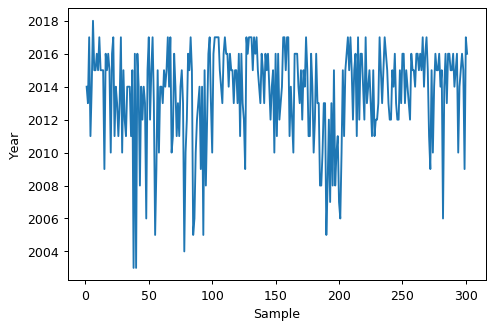

In [37]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 90 # set the resolution to x dpi

Let's make a data **plot**: a set of data pairs $(x_i,y_i)$ are displayed in an $X-Y$ Cartesian space. Pairs can be connected or not by lines. The default behavior is to connect them by solid lines.

The `plot()` method takes as input one or two arrays of data:

- Passing `x` and `y` arrays: the `x` array contains all the $x_i$ values, while the `y` array contains all the paired $y_i$ values. The two arrays must be of the same size.

- Passing only the `y` values: if the $x$ values are not important, apart from being a list of index (e.g., of experiments, records), they can be omitted. In this case, the `x` values get assigned automatically to integers corresponding to the number of the `y`'s entries.


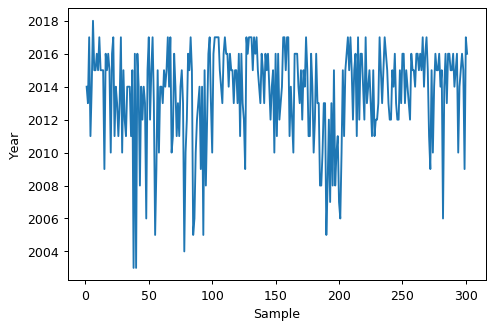

In [41]:
# case where two arrays are passed as input
plt.xlabel('Sample')
plt.ylabel('Year')
sample_idx = list(range(1,302))
plt.plot(sample_idx, year)
plt.show()

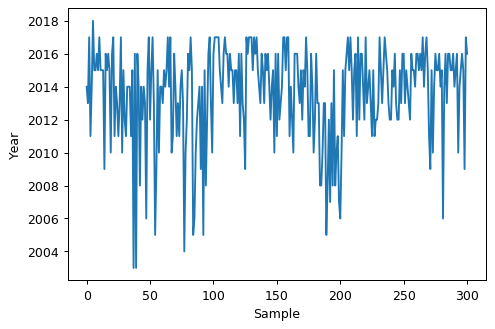

In [40]:
# case where only the y array is passed as input
plt.xlabel('Sample')
plt.ylabel('Year')
plt.plot(year)
plt.show()

Let's look at other data, since the year alone doesn't seem very informative

In [47]:
price = data.loc[:, 'Selling_Price']

In [18]:
price

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
5       9.25
6       6.75
7       6.50
8       8.75
9       7.45
10      2.85
11      6.85
12      7.50
13      6.10
14      2.25
15      7.75
16      7.25
17      7.75
18      3.25
19      2.65
20      2.85
21      4.90
22      4.40
23      2.50
24      2.90
25      3.00
26      4.15
27      6.00
28      1.95
29      7.45
       ...  
271     3.00
272     7.50
273     2.25
274     5.30
275    10.90
276     8.65
277     9.70
278     6.00
279     6.25
280     5.25
281     2.10
282     8.25
283     8.99
284     3.50
285     7.40
286     5.65
287     5.75
288     8.40
289    10.11
290     4.50
291     5.40
292     6.40
293     3.25
294     3.75
295     8.55
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

<u>Scientific question:</u> is there any functional relationship between year and selling price?

Discovering such a relation corresponds to solve a **regression problem.**

Let's display the data using a **scatterplot**: displays $(x,y)$ pairs, no lines. Both `x` and `y` arrays are needed for a scatterplot.

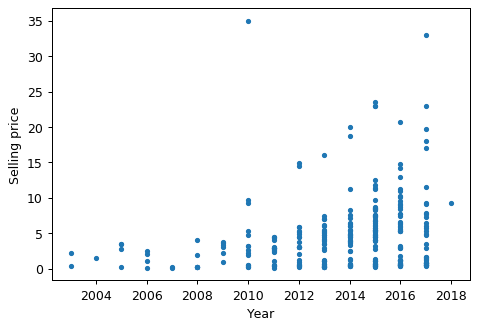

In [48]:
plt.xlabel('Year')
plt.ylabel('Selling price')
plt.scatter(year, price, s=10)
plt.show()

What about the relation between kilometers and selling price?

In [50]:
kms = data.loc[:, 'Kms_Driven']

In [20]:
kms

0      27000
1      43000
2       6900
3       5200
4      42450
5       2071
6      18796
7      33429
8      20273
9      42367
10      2135
11     51000
12     15000
13     26000
14     77427
15     43000
16     41678
17     43000
18     35500
19     41442
20     25000
21      2400
22     50000
23     45280
24     56879
25     20000
26     55138
27     16200
28     44542
29     45000
       ...  
271    69562
272    27600
273    61203
274    16500
275    30753
276    24800
277    21780
278     4000
279    40126
280    14465
281    50456
282    63000
283     9010
284     9800
285    15059
286    28569
287    44000
288    34000
289    10980
290    19000
291    31427
292    12000
293    38000
294    33019
295    60076
296    33988
297    60000
298    87934
299     9000
300     5464
Name: Kms_Driven, Length: 301, dtype: int64

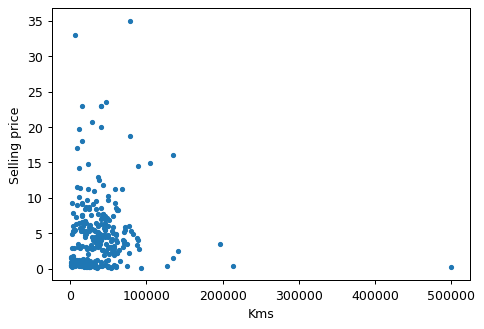

In [51]:
plt.xlabel('Kms')
plt.ylabel('Selling price')
plt.scatter(kms, price, s=10)
plt.show()

There's an **outlier!** ... in order to perform $(Km, price)$ regression, we should probably remove the outlier from the data (how?)